# 矩阵分解 matrix decomposition

在推荐系统中，分解评分矩阵是一种常见的技术，用于潜在因子模型（比如矩阵分解模型）来推荐用户可能喜欢的内容。评分矩阵分解有很多种方法，最常见的包括普通矩阵分解（如梯度下降矩阵分解）和奇异值分解（SVD）。

In recommendation systems, decomposing the rating matrix is a common technique used for latent factor models (such as matrix factorization models) to recommend content that users might like. There are many methods for decomposing the rating matrix, with the most common ones including standard matrix factorization (such as gradient descent matrix factorization) and singular value decomposition (SVD).

In [18]:
import numpy as np

def getRatingsMatrix():
    # 设置随机种子以便结果可复现
    # Set random seed for reproducibility
    np.random.seed(42)

    # 生成一个 5x10 的评分矩阵，评分范围为 1-10
    # Generate a 10x20 rating matrix with scores ranging from 1 to 10
    ratings = np.random.randint(1, 11, size=(5, 10))

    # 随机引入未评分的情况，设置为 0
    # Randomly introduce 'not rated' cases, set to 0
    mask = np.random.rand(5, 10) < 0.3  # 30% 的评分将被设为 0（未评分）
                                        # 30% of the ratings will be set to 0 (not rated)

    # 根据掩码将矩阵中选定的元素设置为 0
    # Set values to 0 (not rated) in the matrix according to the mask
    ratings[mask] = 0
    
    return ratings

# 打印原始评分矩阵
# Print the original rating matrix
ratings = getRatingsMatrix()
print("原始评分矩阵 (Original rating matrix):")
print(ratings)

原始评分矩阵 (Original rating matrix):
[[ 0  4  0  5  7 10  3  0  8  5]
 [ 4  8  8  3  0  0  0  8  6  0]
 [ 5  1  0  6  0  1  0  3  7  0]
 [ 0  3  5  3  7  0  9  0  2  4]
 [ 9  0 10  9 10  5  2  4  0  8]]


### 普通矩阵分解（Matrix Factorization）

普通的矩阵分解通常是指使用优化方法（如梯度下降、交替最小二乘法等）来分解评分矩阵。它的目标是将用户-物品的评分矩阵R分解为两个低秩矩阵U和V，其中U是用户的潜在因子矩阵，V是物品的潜在因子矩阵：

Plain matrix factorization usually refers to the use of optimization methods (such as gradient descent, alternating least squares, etc.) to decompose the rating matrix. The goal is to decompose the user-item rating matrix R into two low-rank matrices U and V, where U is the latent factor matrix for users, and V is the latent factor matrix for items:


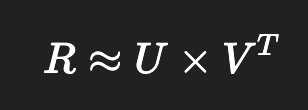

这种分解的核心思想是通过优化（如最小化误差函数）来学习出合适的潜在因子，使得矩阵的重构误差最小化。通常采用梯度下降法来更新用户和物品的潜在因子。

The core idea behind this decomposition is to learn appropriate latent factors by optimizing (e.g., minimizing an error function) in order to minimize the reconstruction error of the matrix. Typically, gradient descent is used to update the latent factors of users and items.

**优点 Advantages**
- 可以处理稀疏矩阵（即评分矩阵中有大量缺失值）。 
- 通过正则化可以控制模型的复杂度，防止过拟合。
- Can handle sparse matrices (i.e., rating matrices with many missing values)
- Regularization can be used to control the complexity of the model and prevent overfitting.

**缺点 Disadvantages**
- 需要设定潜在因子数 k；
- 需要手动选择优化方法，训练过程可能比较耗时。
- Requires setting the number of latent factors k.
- The optimization method must be manually chosen, and the training process can be time-consuming.

In [19]:
import numpy as np
from sklearn.decomposition import NMF


# 将评分矩阵中的 0 替换为一个小的正数以适合 NMF
# Replace 0 in the rating matrix with a small positive number for NMF compatibility
ratings[ratings == 0] = 1e-5

# 初始化 NMF 模型，指定潜在因子数 K=3
# Initialize the NMF model with number of latent factors K=3
K = 3
model = NMF(n_components=K, init='random', random_state=42)

# 对评分矩阵进行分解
# Perform matrix factorization on the rating matrix
U = model.fit_transform(ratings)
V = model.components_

# 打印分解后的矩阵 U 和 V
# Print the decomposed matrices U and V
print("\n矩阵 U (Matrix U):")
print(U)

print("\n矩阵 V (Matrix V):")
print(V.T)

# 计算 U * V^T 得到近似的评分矩阵
# Calculate the approximate rating matrix U * V^T
predicted_ratings = np.dot(U, V)

# 打印分解后的近似评分矩阵
# Print the approximated rating matrix
print("\n分解后的近似评分矩阵 (Approximated rating matrix U * V^T):")
print(predicted_ratings)

# 计算分解后的矩阵与原始评分矩阵的误差（仅考虑原始评分矩阵中的非零项）
# Calculate the error between the original and the approximated rating matrix (only for non-zero entries)
error = np.sqrt(np.sum((ratings - predicted_ratings) ** 2))
print("\n原始评分矩阵与分解矩阵之间的误差 (Error between original and factorized matrix):")
print(error)


矩阵 U (Matrix U):
[[0.         4.0355817  0.        ]
 [0.         0.         3.02841333]
 [0.         0.75768428 1.37998358]
 [1.59969792 1.06810983 0.        ]
 [4.23595825 0.         0.22455959]]

矩阵 V (Matrix V):
[[1.7788129  0.         1.73848968]
 [0.0497708  0.98406197 2.20482362]
 [2.35515614 0.         2.17800366]
 [1.9188532  1.28469334 1.45762638]
 [2.46636949 1.75056438 0.        ]
 [0.84941033 2.20334726 0.        ]
 [1.02298564 1.10949154 0.        ]
 [0.70719913 0.         2.5698915 ]
 [0.         2.07284281 2.30656645]
 [1.86653341 1.18111498 0.        ]]

分解后的近似评分矩阵 (Approximated rating matrix U * V^T):
[[ 0.          3.97126246  0.          5.18448495  7.06454559  8.89178787
   4.47744375  0.          8.36512652  4.766486  ]
 [ 5.26486533  6.67711726  6.59589532  4.41429516  0.          0.
   0.          7.7826937   6.98523659  0.        ]
 [ 2.39908722  3.78822869  3.0056093   2.98489242  1.32637511  1.66944158
   0.8406443   3.54640809  4.75358424  0.89491225]
 [ 2.

K=1, Error=21.8069
K=2, Error=16.8765
K=3, Error=11.5702
K=4, Error=8.8960
K=5, Error=0.0367
K=6, Error=0.0417
K=7, Error=0.0422
K=8, Error=0.0251
K=9, Error=0.0588
K=10, Error=0.0357


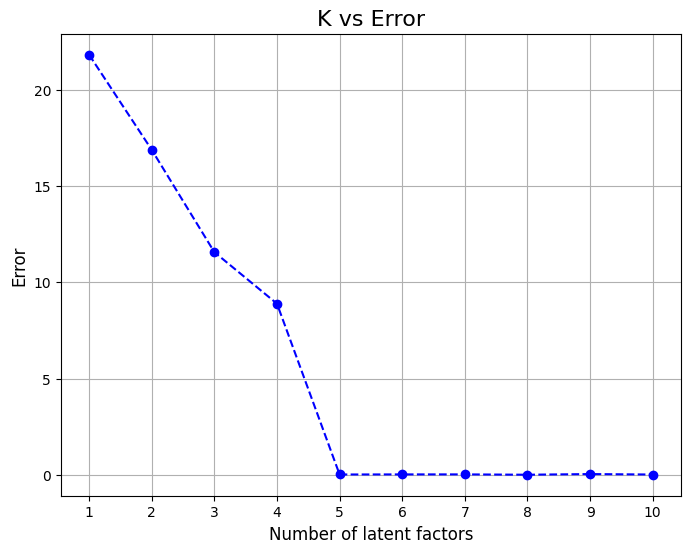

In [22]:
import numpy as np
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

ratings = getRatingsMatrix()

# 存储每个 K 值对应的误差
# Store the error for each K value
errors = []

# 尝试不同的 K 值，从 1 到 10
# Try different K values from 1 to 10
for K in range(1, 11):
    # 初始化 NMF 模型
    # Initialize the NMF model
    model = NMF(n_components=K, init='random', random_state=42, max_iter=500)
    
    # 对评分矩阵进行分解
    # Perform matrix factorization on the rating matrix
    U = model.fit_transform(ratings)
    V = model.components_

    # 计算 U * V^T 得到近似的评分矩阵
    # Calculate the approximated rating matrix U * V^T
    predicted_ratings = np.dot(U, V)

    # 计算分解后的矩阵与原始评分矩阵的误差（仅考虑原始评分矩阵中的非零项）
    # Calculate the error between the original and the approximated rating matrix (only for non-zero entries)
    error = np.sqrt(np.sum((ratings - predicted_ratings) ** 2))
    
    # 保存误差
    # Store the error
    errors.append(error)

# 打印所有 K 值对应的误差
# Print the errors for all K values
for i, error in enumerate(errors, start=1):
    print(f"K={i}, Error={error:.4f}")

# 绘制 K 与误差的关系图
# Plot the relationship between K and error
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), errors, marker='o', linestyle='--', color='b')
plt.title('K vs Error', fontsize=16)
plt.xlabel('Number of latent factors', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### 奇异值分解（SVD, Singular Value Decomposition）

SVD 是一种线性代数中的矩阵分解技术，它将一个矩阵 R 分解为三个矩阵的乘积：

SVD is a matrix decomposition technique in linear algebra that decomposes a matrix R into the product of three matrices:

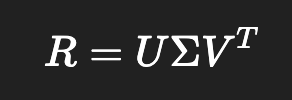

其中：
- U 是一个用户矩阵，表示用户在潜在特征空间中的表示（用户特征矩阵）。
- Σ 是一个对角矩阵，包含奇异值，表示特征的重要性。
- V^T 是物品矩阵的转置，表示物品在潜在特征空间中的表示（物品特征矩阵）。

Where:
- U is a user matrix, representing the users' representation in the latent feature space (user feature matrix).
- Σ is a diagonal matrix containing singular values, representing the importance of the features.
- V^T is the transpose of the item matrix, representing the items' representation in the latent feature space (item feature matrix).

在推荐系统中，通常只取前 k 个最大的奇异值及对应的奇异向量，从而得到一个近似的低秩矩阵：

In recommendation systems, typically only the top k largest singular values and their corresponding singular vectors are retained to obtain an approximate low-rank matrix:
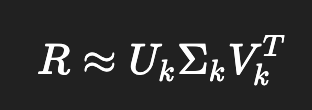

这和普通矩阵分解有相似的地方，都是通过低秩矩阵来近似原始评分矩阵，但 SVD 是一种更为严格的数学分解方法，且通常需要对评分矩阵进行填充或处理缺失值。

This is similar to standard matrix factorization in that both approximate the original rating matrix using a low-rank matrix. However, SVD is a more rigorous mathematical decomposition method and usually requires filling in or handling missing values in the rating matrix.

**优点 Advantages**
- 数学上理论严谨，分解唯一且稳定。
- 可以直接得到矩阵的最优近似（截断奇异值后）。
- Mathematically rigorous, with a unique and stable decomposition.
- Provides the optimal approximation of the matrix (after truncating singular values).

**缺点 Disadvantages**
- 无法直接处理稀疏矩阵，必须对缺失值进行处理（如填补）。
- 对大规模矩阵计算开销较大。
- Cannot directly handle sparse matrices; missing values must be processed (e.g., filled in).
- Computationally expensive for large-scale matrices.

In [23]:
import numpy as np
from numpy.linalg import svd

ratings = getRatingsMatrix()

# 使用 NumPy 的 SVD 进行分解
# Perform SVD decomposition using NumPy
U, Sigma, Vt = svd(ratings, full_matrices=False)

# 打印分解出的 U, Sigma, V 矩阵
# Print the decomposed matrices U, Sigma, and V
print("\n矩阵 U (Matrix U):")
print(U)

print("\n奇异值 Σ (Singular values Σ):")
print(Sigma)

print("\n矩阵 V^T (Matrix V^T):")
print(Vt)

# 将奇异值矩阵 Σ 转换为对角矩阵
# Convert the singular values Σ into a diagonal matrix
Sigma_diag = np.diag(Sigma)

# 通过 U * Σ * V^T 还原近似评分矩阵
# Reconstruct the approximated rating matrix using U * Σ * V^T
predicted_ratings = np.dot(np.dot(U, Sigma_diag), Vt)

# 打印近似的评分矩阵
# Print the approximated rating matrix
print("\n近似评分矩阵 (Approximated rating matrix U * Σ * V^T):")
print(predicted_ratings)

# 计算原始评分矩阵与分解矩阵之间的误差（仅考虑原始评分矩阵中的非零项）
# Calculate the error between the original and the approximated rating matrix (only for non-zero entries)
error = np.sqrt(np.sum((ratings[ratings > 0] - predicted_ratings[ratings > 0]) ** 2))
print("\n原始评分矩阵与分解矩阵之间的误差 (Error between original and factorized matrix):")
print(error)


矩阵 U (Matrix U):
[[-0.45204293  0.34959965  0.7475004  -0.10574332 -0.32171225]
 [-0.36967082 -0.79498544  0.05256909  0.34152032 -0.33457734]
 [-0.24490218 -0.34907945  0.29564314 -0.36665545  0.77222106]
 [-0.36146614  0.31507241 -0.07642487  0.76622884  0.42086126]
 [-0.68437257  0.15700684 -0.58756618 -0.38812287 -0.10540237]]

奇异值 Σ (Singular values Σ):
[29.16262027 13.8619289  12.41635076  9.75537271  5.8357042 ]

矩阵 V^T (Matrix V^T):
[[-0.30390093 -0.2089949  -0.3980583  -0.41431091 -0.42994385 -0.28074276
  -0.20499081 -0.22047276 -0.28363761 -0.31482287]
 [-0.25337581 -0.31491628 -0.23189075 -0.02691948  0.44891104  0.28365109
   0.30287736 -0.4890441  -0.27316016  0.30762982]
 [-0.28990833  0.28002776 -0.47012472  0.01221759 -0.09488561  0.38923001
   0.03056816 -0.08398463  0.66139159 -0.10218195]
 [-0.40596109  0.43475739  0.27493344 -0.2971191   0.07607808 -0.34490768
   0.59480904  0.00817035  0.01732839 -0.05830471]
 [ 0.26974887 -0.3304936  -0.27868722  0.40012233 -0.0

K=1, Error=16.6699
K=2, Error=13.4170
K=3, Error=9.9864
K=4, Error=4.8344
K=5, Error=0.0000
K=6, Error=0.0000
K=7, Error=0.0000
K=8, Error=0.0000
K=9, Error=0.0000
K=10, Error=0.0000


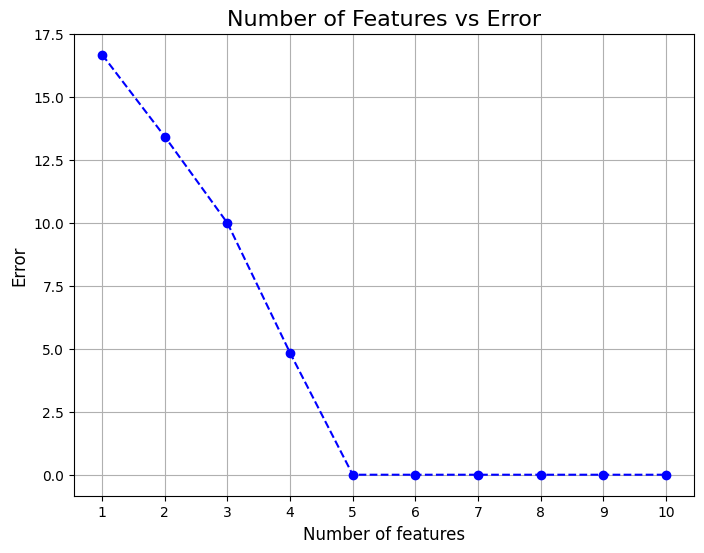

In [25]:
# 保存不同特征数量下的误差
# Store the error for different numbers of features
errors = []

# 我们将从1到10个特征进行近似
# We will approximate the matrix using 1 to 10 features
for k in range(1, 11):
    # 保留前 k 个奇异值
    # Retain the first k singular values
    Sigma_k = np.diag(Sigma[:k])
    
    # 计算近似的评分矩阵
    # Compute the approximated rating matrix
    U_k = U[:, :k]  # 取前 k 列
    Vt_k = Vt[:k, :]  # 取前 k 行
    predicted_ratings_k = np.dot(np.dot(U_k, Sigma_k), Vt_k)
    
    # 计算原始评分矩阵与近似评分矩阵之间的误差（仅考虑原始评分矩阵中的非零项）
    # Calculate the error between the original and the approximated rating matrix (only for non-zero entries)
    error = np.sqrt(np.sum((ratings[ratings > 0] - predicted_ratings_k[ratings > 0]) ** 2))
    
    # 保存误差
    # Store the error
    errors.append(error)

# 打印所有特征数量对应的误差
# Print the errors for all numbers of features
for i, error in enumerate(errors, start=1):
    print(f"K={i}, Error={error:.4f}")

# 绘制 特征数量 与 误差 的关系图
# Plot the relationship between number of features and error
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), errors, marker='o', linestyle='--', color='b')
plt.title('Number of Features vs Error', fontsize=16)
plt.xlabel('Number of features', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()